# 02. Neural Network Classification with Tensorflow Exercises


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

tf.__version__

'2.9.1'

## 3. Create a classification dataset using Scikit-Learn's `make_moons()` function, visualize it and then build a model to fit it at over 85% accuracy.

In [5]:
from sklearn.datasets import make_moons

X, y = make_moons(
    n_samples = 1000,
    noise = 0.05,
    random_state = 42
)

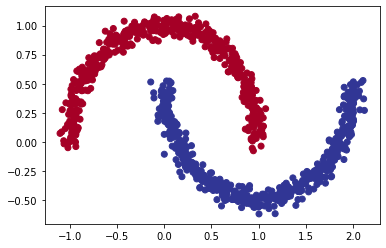

In [7]:
# Visualise the Data

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu);

We can clearly see that the boundary between the two types of classes should be non-linear. This will need non-linear activation layers.

Let us first make a function that will be able to visualise the boundary created by the model.

In [8]:
def plot_decision_boundary(model, X, y):
    """
    """

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 1].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)
    # Check for multi-class classification
    if len(y_pred[0]) > 1:
        print("Multiclass classification")
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    else:
        print("Binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    return

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [16]:
# 1. Create the model
model_moons = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(8, activation = "relu", input_shape = (2,), name = "input_layer"),
        tf.keras.layers.Dense(8, activation = "relu", name = "hidden_layer_1"),
        tf.keras.layers.Dense(1, activation = "sigmoid", name = "output_layer")
    ], name = "model_moons"
)

# 2. Compile the model
model_moons.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics = ["accuracy", tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
)

# 3. Fit the model
model_moons.fit(X_train, y_train, epochs = 100)

Epoch 1/100
25/25 [==============================] - 1s 15ms/step - loss: 0.6381 - accuracy: 0.5863 - precision_2: 1.0000 - recall_2: 0.1725
Epoch 2/100
25/25 [==============================] - 0s 10ms/step - loss: 0.6017 - accuracy: 0.7237 - precision_2: 1.0000 - recall_2: 0.4475
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 0.5662 - accuracy: 0.8112 - precision_2: 0.9844 - recall_2: 0.6325
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 0.5292 - accuracy: 0.8425 - precision_2: 0.9127 - recall_2: 0.7575
Epoch 5/100
25/25 [==============================] - 0s 9ms/step - loss: 0.4891 - accuracy: 0.8662 - precision_2: 0.8766 - recall_2: 0.8525
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 0.4483 - accuracy: 0.8700 - precision_2: 0.8700 - recall_2: 0.8700
Epoch 7/100
25/25 [==============================] - 0s 8ms/step - loss: 0.4088 - accuracy: 0.8637 - precision_2: 0.8593 - recall_2: 0.8700
Epoch 8/100
25/25 

In [17]:
model_moons.evaluate(X_test, y_test)

7/7 [==============================] - 0s 12ms/step - loss: 0.0289 - accuracy: 1.0000 - precision_2: 1.0000 - recall_2: 1.0000


[0.028852371498942375, 1.0, 1.0, 1.0]

Woohoo! We've made it! Lets visualize the decision boundary now.

313/313 [==============================] - 1s 2ms/step
Binary classification


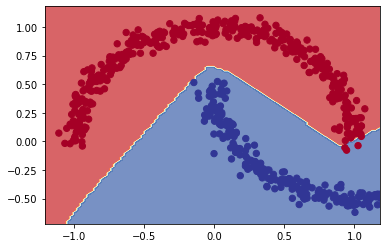

In [18]:
plot_decision_boundary(model_moons, X_train, y_train)

Looks good enough for the job!

## 4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [19]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [38]:
# Unique classes
un_array, idx = tf.unique(y_train)
un_array.numpy().shape[0]

10

Before training lets normalize the data.

In [49]:
x_max, x_min = X_train.max(), X_train.min()

X_train_norm = (X_train - x_min)/(x_max - x_min)
X_test_norm = (X_test - x_min)/(x_max - x_min)

Now first lets train a model and then create the confusion matrix function.

In [70]:
# 1. Create the model
model_mnist = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape = (28,28,), name = "flatten_layer"),
        tf.keras.layers.Dense(64, activation = "relu", name = "input_layer"),
        tf.keras.layers.Dense(128, activation = "relu", name = "hidden_layer_1"),
        tf.keras.layers.Dense(128, activation = "relu", name = "hidden_layer_2"),
        tf.keras.layers.Dense(32, activation = "relu", name = "hidden_layer_3"),
        tf.keras.layers.Dense(un_array.numpy().shape[0], activation = "softmax", name = "output_layer")
    ], name = "model_mnist"
)

# 2. Compile the model
model_mnist.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
    metrics = ["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# 3. Fit the model
model_history = model_mnist.fit(X_train_norm, tf.one_hot(y_train, depth = un_array.numpy().shape[0]), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5079 - accuracy: 0.8159 - precision_21: 0.8672 - recall_21: 0.7641
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3711 - accuracy: 0.8644 - precision_21: 0.8929 - recall_21: 0.8371
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3377 - accuracy: 0.8757 - precision_21: 0.9009 - recall_21: 0.8522
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3204 - accuracy: 0.8813 - precision_21: 0.9041 - recall_21: 0.8601
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3029 - accuracy: 0.8869 - precision_21: 0.9083 - recall_21: 0.8680
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2865 - accuracy: 0.8945 - precision_21: 0.9133 - recall_21: 0.8764
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2786 - accuracy: 0.8949 - precision_21: 0.914

In [71]:
model_mnist.evaluate(X_test, tf.one_hot(y_test, depth = 10))

313/313 [==============================] - 3s 8ms/step - loss: 51.4807 - accuracy: 0.8498 - precision_21: 0.8498 - recall_21: 0.8498


[51.48072052001953, 0.8497999906539917, 0.8497999906539917, 0.8497999906539917]

<AxesSubplot:>

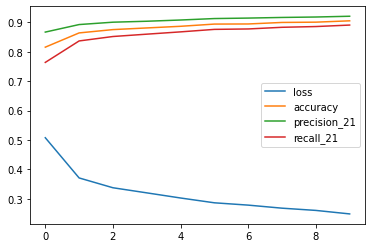

In [72]:
pd.DataFrame(model_history.history).plot()

In [75]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(model, X, y, figsize = (15, 10), classes = None, text_size = 15):
    """
    """
    y_pred = model.predict(X)
    y_pred_labels = tf.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred_labels)
    cm_norm = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis]
    n_classes = cm_norm.shape[0]
    fig, ax = plt.subplots(figsize = figsize)

    # Create a matrix plot
    cax = ax.matshow(cm, cmap = plt.cm.Blues);
    fig.colorbar(cax);

    if classes:
        labels = classes

    else:
        labels = np.arange(cm.shape[0])

    n_classes = len(labels)

    # Label the axes
    ax.set(title = "confusion_matrix",
           xlabel = "predicted_label",
           ylabel = "true_label",
           xticks = np.arange(n_classes),
           yticks = np.arange(n_classes),
           xticklabels = labels,
           yticklabels = labels
    );

    # Set threshold for different colors
    threshold = (cm.max() + cm.min())/2

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust the label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
                horizontalalignment = "center",
                color = "white" if cm[i,j] > threshold else "black",
                size = text_size)

In [73]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

1875/1875 [==============================] - 4s 2ms/step


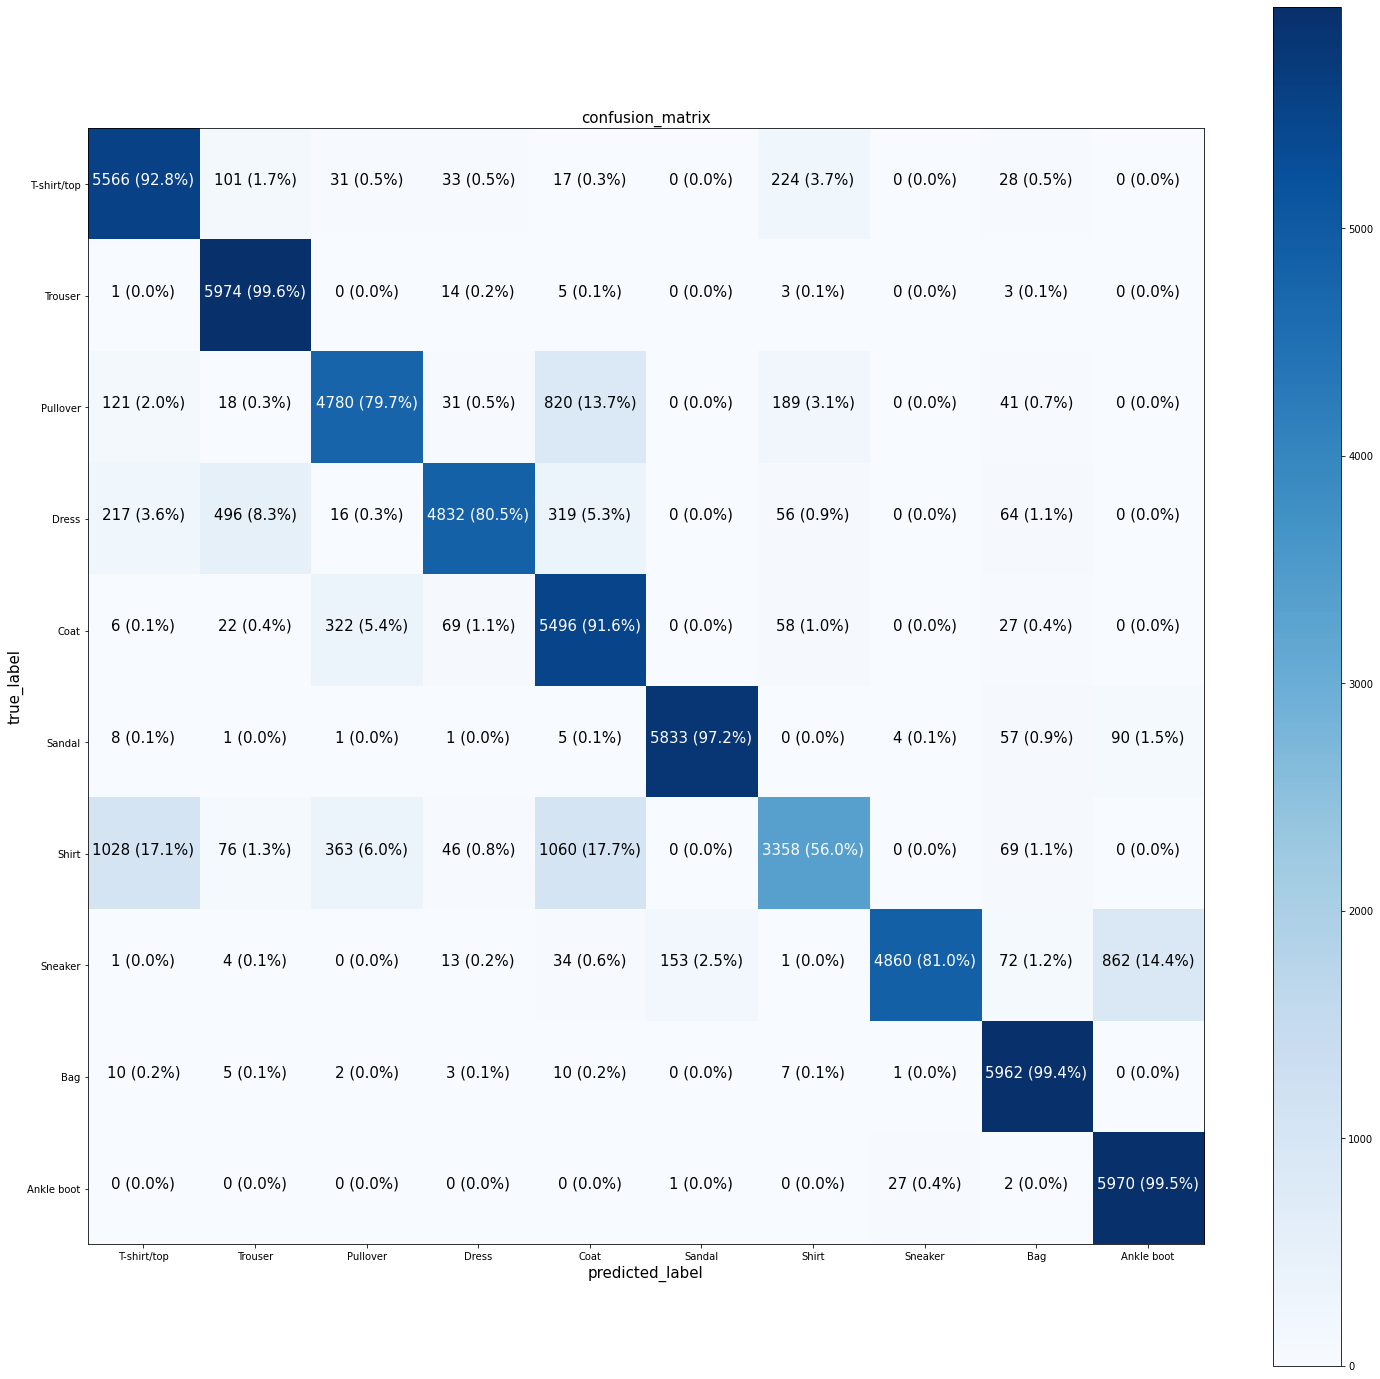

In [77]:
plot_confusion_matrix(model_mnist, X_train, y_train, figsize = (25,25), classes = class_names)